In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/Social_Network_Ads-9fe0a38d-3fd1-4562-8ef4-528f57d15d5f.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

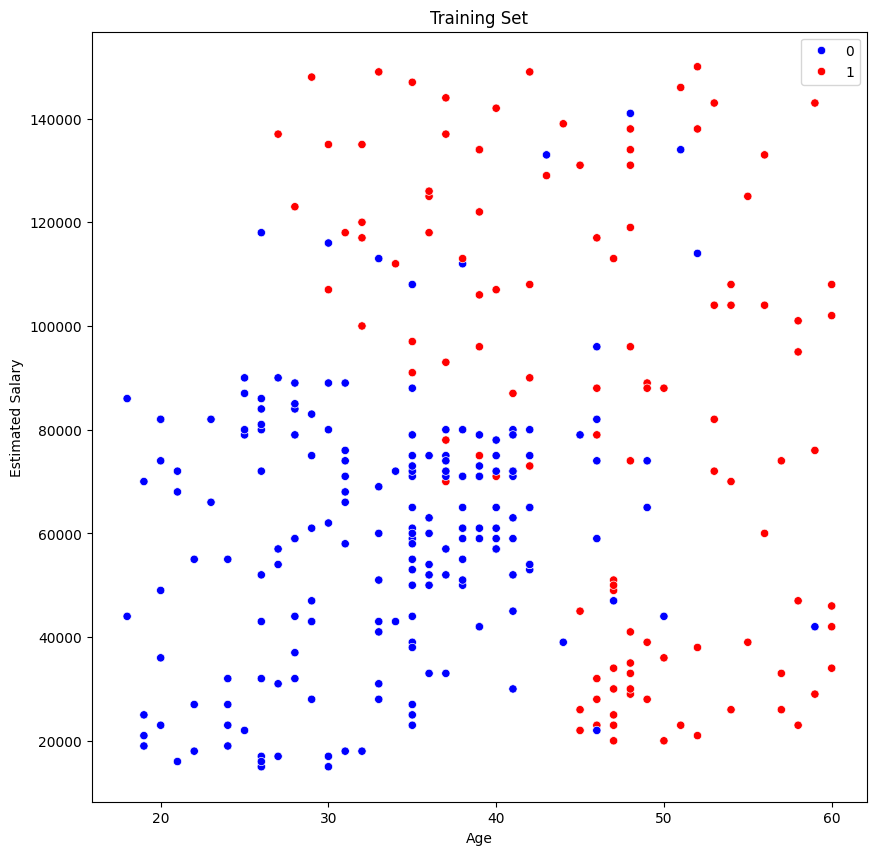

In [4]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette={ 0:'blue',1:'red'},marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Set')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

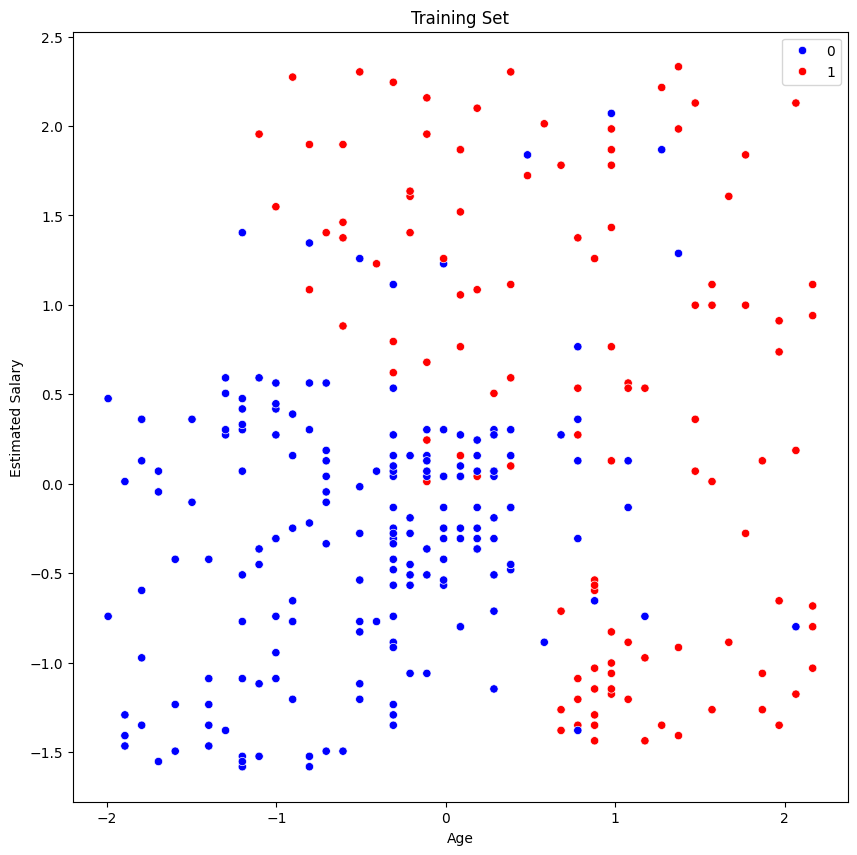

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette={ 0:'blue',1:'red'},marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Set')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report #for acccuracy checking
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 89.00%


In [9]:
print("coefficients:",classifier.coef_)
print("intercept:",classifier.intercept_)

coefficients: [[2.07665837 1.11008221]]
intercept: [-0.95217247]


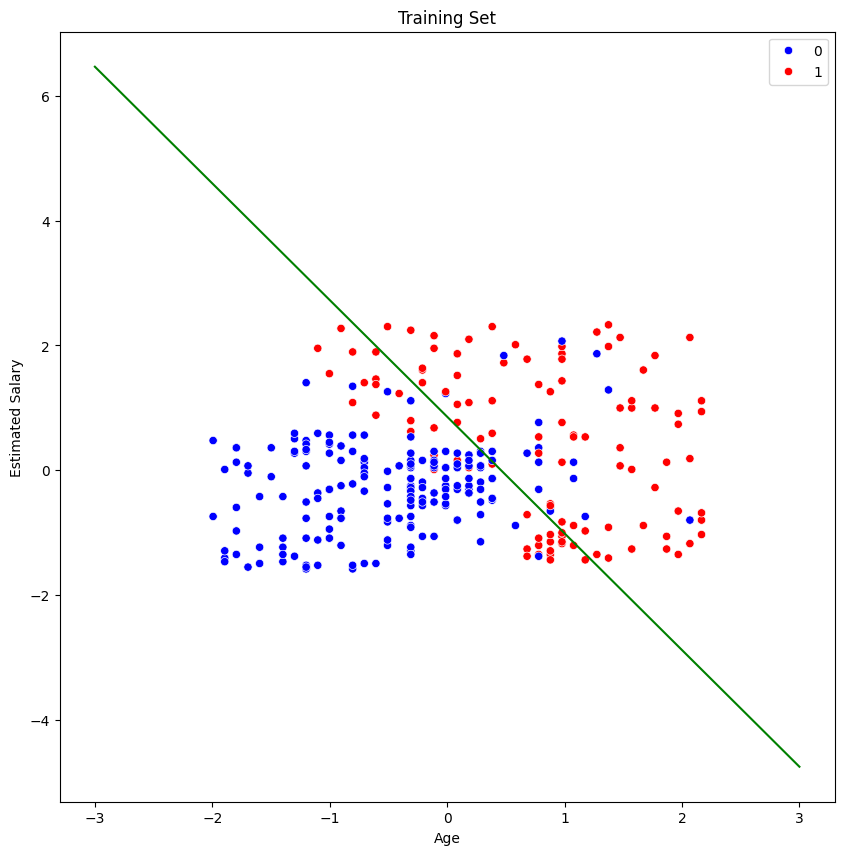

In [10]:
import seaborn as sns
x1 = np.linspace(-3,3,100)
x2 = (-2.07665837* x1 +0.95217247)/1.11008221
plt.figure(figsize=(10,10))
plt.plot(x1,x2,color='green')
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette={ 0:'blue',1:'red'},marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Set')
plt.show()

In [11]:
#9

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)
print(f"Test Accuracy (k-5):{accuracy_score(y_test,y_pred):.2f}")

Test Accuracy (k-5):0.93


In [14]:
x1_vals = np.linspace(-3,3,400)
x2_vals = np.linspace(-3,3,400)
x1,x2 =np.meshgrid(x1_vals,x2_vals)

In [15]:
Z = knn.predict(np.c_[x1.ravel(),x2.ravel()])
Z = Z.reshape(x1.shape)

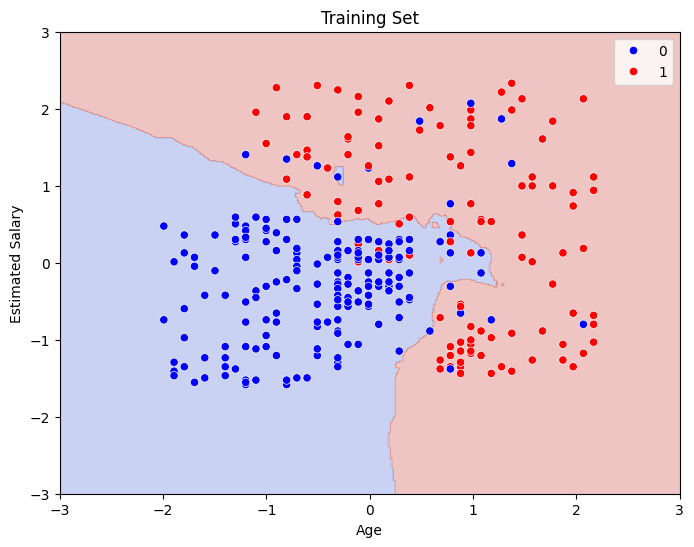

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.contourf(x1,x2,Z,cmap=plt.cm.coolwarm,alpha=0.3)
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette={ 0:'blue',1:'red'},marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Set')
plt.show()

In [17]:
#10
from sklearn.svm import SVC
classifier= SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [18]:
y_pred =classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 90.00%


/tmp/ipython-input-1907714564.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],


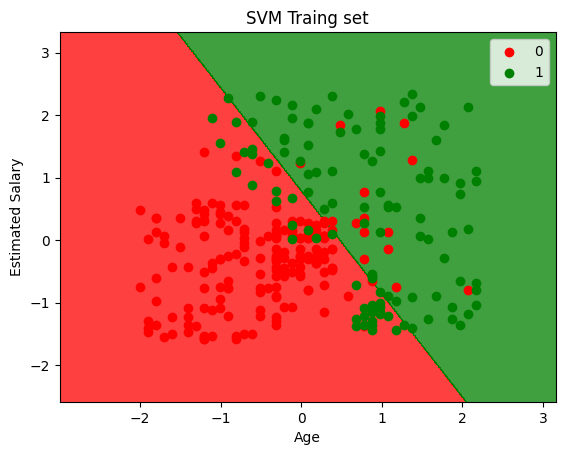

In [19]:
from matplotlib.colors import ListedColormap
X_set,y_set =X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max() +1, step = 0.01),
                     np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('SVM Traing set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [20]:

print(classifier.dual_coef_)
print(classifier.intercept_)

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.70942619 -1.         -1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.     

In [21]:
#11
weights = classifier.coef_
bias = classifier.intercept_

In [22]:
with open("svm_model.h","w")as f:
  f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
  f.write(f"#define NUM_FEATURES {weights.shape[1]}\n")

  f.write("double weights[NUM_CLASSES][NUM_FEATURES] = {\n")
  for row in weights:
    f.write("   {" + ",".join (f"{v:.10f}" for v in row ) + "},\n")
  f.write("};\n\n")
  f.write("double weights[NUM_CLASSES]={"+",".join (f"{b:.10f}" for b in bias ) + "};\n")
print("Exported svm_model tosvm_model.h")


Exported svm_model tosvm_model.h


In [23]:
mean = sc.mean_
scale = sc.scale_
with open ("scaler.h","w") as f:
   f.write(f"#define NUM_FEATURES {len(mean)}\n\n")

   f.write("double mean[NUM_FEATURES] = {\n")
   f.write("   {" + ",".join (f"{m:.10f}" for m in mean ) + "\n};\n\n")

   f.write("double mean[NUM_FEATURES] = {\n")
   f.write("   {" + ",".join (f"{s:.10f}" for s in scale ) + "\n};\n")

print("Exported scaler parameter to scalar.h")


Exported scaler parameter to scalar.h
